# Basic models

The point of this section is to train a couple of basic models and see how they perform. We want to create a pipeline for the training data and also use the validation data to validate models and calculate scores.

In [1]:
import sys
sys.path.append('scripts')

%matplotlib inline

import random as rnd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import process
import transforms
from scipy.stats import boxcox
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import f1_score

sb.set_style('dark')

## Preprocess the dataset

As always, let's start by loading the dataset and preprocessing it. We will create 2 pipelines - one with normalization and box-cox transform only, the other with PCA as well.

In [2]:
data, target = process.load_dataset_target('data/train.csv', 'data/train_target.csv')
target = target[0]

In [3]:
data_pipe = make_pipeline(transforms.LowVarianceRemover(), transforms.BoxcoxTransform(), StandardScaler())
data_pipe_pca = make_pipeline(transforms.LowVarianceRemover(), transforms.BoxcoxTransform(), StandardScaler(), PCA())

In [4]:
data_norm = data_pipe.fit_transform(data)
data_norm_pca = data_pipe_pca.fit_transform(data)

Let's also load and preprocess the validation dataset.

In [5]:
valdata, valtarget = process.load_dataset_target('data/valid.csv', 'data/valid_target.csv')
valtarget = valtarget[0]

In [6]:
valdata_norm = data_pipe.fit(data).transform(valdata)
valdata_norm_pca = data_pipe_pca.fit(data).transform(valdata)

## Models using preprocessed data

Now let's train the models using the data. First we'll use the data without PCA. We will be only using a sample of the data to decrease the time it takes to train the models.

In [7]:
sample = rnd.sample(list(data.index.values), 400000)
data_sample = data_norm[sample]
target_sample = target[sample].values

In [8]:
valdata_sample = valdata_norm[sample]
valtarget_sample = valtarget[sample].values

### Logistic regression

In [9]:
logreg = make_pipeline(LogisticRegression())
logreg_models = []
logreg_scores = []
for train, test in KFold().split(data_sample):
    data_train, data_test, target_train, target_test = data_sample[train], data_sample[test], target_sample[train], target_sample[test]
    model = logreg.fit(data_train, target_train)
    score = f1_score(target_test, model.predict(data_test), average='macro')
    logreg_models.append(model)
    logreg_scores.append(score)

/usr/local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [10]:
logreg_model = logreg_models[np.argmax(logreg_scores)]

### Decision tree

In [11]:
dtree = make_pipeline(DecisionTreeClassifier())
dtree_models = []
dtree_scores = []
for train, test in KFold().split(data_sample):
    data_train, data_test, target_train, target_test = data_sample[train], data_sample[test], target_sample[train], target_sample[test]
    model = dtree.fit(data_train, target_train)
    score = f1_score(target_test, model.predict(data_test), average='macro')
    dtree_models.append(model)
    dtree_scores.append(score)

In [12]:
dtree_model = dtree_models[np.argmax(dtree_scores)]

### Gaussian naive bayes

In [13]:
gnb = make_pipeline(GaussianNB())
gnb_models = []
gnb_scores = []
for train, test in KFold().split(data_sample):
    data_train, data_test, target_train, target_test = data_sample[train], data_sample[test], target_sample[train], target_sample[test]
    model = gnb.fit(data_train, target_train)
    score = f1_score(target_test, model.predict(data_test), average='macro')
    gnb_models.append(model)
    gnb_scores.append(score)

In [14]:
gnb_model = gnb_models[np.argmax(gnb_scores)]

### Support vector classifier

In [15]:
svc = make_pipeline(SVC())
svc_models = []
svc_scores = []
for train, test in KFold().split(data_sample):
    data_train, data_test, target_train, target_test = data_sample[train], data_sample[test], target_sample[train], target_sample[test]
    model = svc.fit(data_train, target_train)
    score = f1_score(target_test, model.predict(data_test), average='macro')
    svc_models.append(model)
    svc_scores.append(score)

/usr/local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [16]:
svc_model = svc_models[np.argmax(svc_scores)]

### Extra trees

In [17]:
xtrees = make_pipeline(ExtraTreesClassifier())
xtrees_models = []
xtrees_scores = []
for train, test in KFold().split(data_sample):
    data_train, data_test, target_train, target_test = data_sample[train], data_sample[test], target_sample[train], target_sample[test]
    model = xtrees.fit(data_train, target_train)
    score = f1_score(target_test, model.predict(data_test), average='macro')
    xtrees_models.append(model)
    xtrees_scores.append(score)

In [18]:
xtrees_model = xtrees_models[np.argmax(xtrees_scores)]

## Evaluation

Now that all the models are trained, let's use their models to predict for the validation dataset. Calculate the macro F1 score for each model.

In [19]:
labels = ['Logistic\nregression', 'Decision tree', 'Gaussian\nnaive bayes', 'Support vector\nclassifier', 'Extra trees']
models = [logreg_model, dtree_model, gnb_model, svc_model, xtrees_model]

In [20]:
scores = [f1_score(valtarget_sample, model.predict(valdata_sample), average='macro') for model in models]

/usr/local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


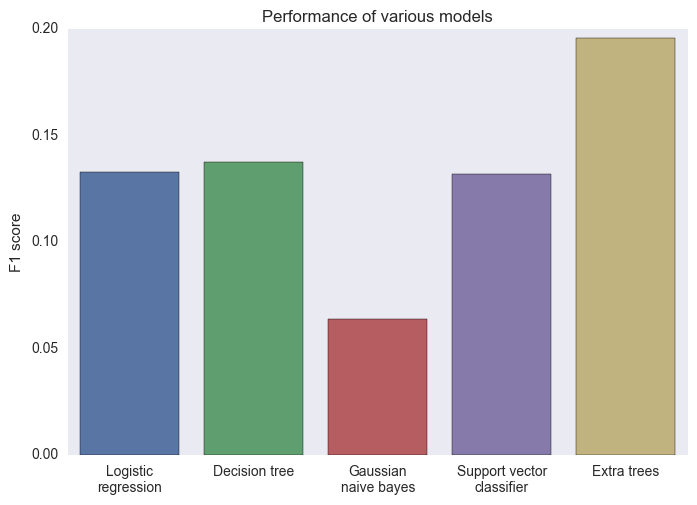

In [21]:
sb.barplot(labels, scores)
plt.title('Performance of various models')
plt.ylabel('F1 score')

## PCA data

Now let's train the same models on the data preprocessed using PCA.

*NOTE: I just found `%time` and will use it from now on. The models above took about 2 hours to train, predict, and score.*

In [22]:
sample_pca = rnd.sample(list(data.index.values), 400000)
data_sample_pca = data_norm_pca[sample_pca]
target_sample_pca = target[sample_pca].values

In [23]:
valdata_sample_pca = valdata_norm_pca[sample_pca]
valtarget_sample_pca = valtarget[sample_pca].values

### Logistic regression

In [25]:
%%time
logreg_models_pca = []
logreg_scores_pca = []
for train, test in KFold().split(data_sample_pca):
    print('training a model')
    data_train, data_test, target_train, target_test = data_sample_pca[train], data_sample_pca[test], target_sample_pca[train], target_sample_pca[test]
    model = logreg.fit(data_train, target_train)
    score = f1_score(target_test, model.predict(data_test), average='macro')
    print('model score is %f' % score)
    logreg_models_pca.append(model)
    logreg_scores_pca.append(score)

training a model


/usr/local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


model score is 0.508749
training a model


/usr/local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


model score is 0.512362
training a model
model score is 0.509241
CPU times: user 11min 50s, sys: 1.81 s, total: 11min 52s
Wall time: 11min 53s


/usr/local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [26]:
logreg_model_pca = logreg_models_pca[np.argmax(logreg_scores_pca)]

### Decision tree

In [27]:
%%time
dtree_models_pca = []
dtree_scores_pca = []
for train, test in KFold().split(data_sample_pca):
    print('training a model')
    data_train, data_test, target_train, target_test = data_sample_pca[train], data_sample_pca[test], target_sample_pca[train], target_sample_pca[test]
    model = dtree.fit(data_train, target_train)
    score = f1_score(target_test, model.predict(data_test), average='macro')
    print('model score is %f' % score)
    dtree_models_pca.append(model)
    dtree_scores_pca.append(score)

training a model
model score is 0.753065
training a model
model score is 0.747894
training a model
model score is 0.753051
CPU times: user 2min 40s, sys: 430 ms, total: 2min 40s
Wall time: 2min 40s


In [28]:
dtree_model_pca = dtree_models_pca[np.argmax(dtree_scores_pca)]

### Gaussian naive bayes

In [29]:
%%time
gnb_models_pca = []
gnb_scores_pca = []
for train, test in KFold().split(data_sample_pca):
    print('training a model')
    data_train, data_test, target_train, target_test = data_sample_pca[train], data_sample_pca[test], target_sample_pca[train], target_sample_pca[test]
    model = gnb.fit(data_train, target_train)
    score = f1_score(target_test, model.predict(data_test), average='macro')
    print('model score is %f' % score)
    gnb_models_pca.append(model)
    gnb_scores_pca.append(score)

training a model
model score is 0.468766
training a model
model score is 0.469160
training a model
model score is 0.459198
CPU times: user 3.05 s, sys: 1.78 s, total: 4.83 s
Wall time: 4.84 s


In [30]:
gnb_model_pca = gnb_models_pca[np.argmax(gnb_scores_pca)]

### Extra trees

In [31]:
%%time
xtrees_models_pca = []
xtrees_scores_pca = []
for train, test in KFold().split(data_sample_pca):
    print('training a model')
    data_train, data_test, target_train, target_test = data_sample_pca[train], data_sample_pca[test], target_sample_pca[train], target_sample_pca[test]
    model = xtrees.fit(data_train, target_train)
    score = f1_score(target_test, model.predict(data_test), average='macro')
    print('model score is %f' % score)
    xtrees_models_pca.append(model)
    xtrees_scores_pca.append(score)

training a model
model score is 0.830104
training a model
model score is 0.819630
training a model
model score is 0.814714
CPU times: user 15.8 s, sys: 844 ms, total: 16.7 s
Wall time: 16.7 s


In [32]:
xtrees_model_pca = xtrees_models_pca[np.argmax(xtrees_scores_pca)]

## Evaluation

Let's look into how these models perform on the validation data. Will they perform better or worse than models without PCA?

In [34]:
labels_pca = ['Logistic\nregression', 'Decision tree', 'Gaussian\nnaive bayes', 'Extra trees']
models_pca = [logreg_model_pca, dtree_model_pca, gnb_model_pca, xtrees_model_pca]

In [35]:
%%time
scores_pca = [f1_score(valtarget_sample_pca, model.predict(valdata_sample_pca), average='macro') for model in models_pca]

/usr/local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


CPU times: user 4.45 s, sys: 3.26 s, total: 7.71 s
Wall time: 7.48 s


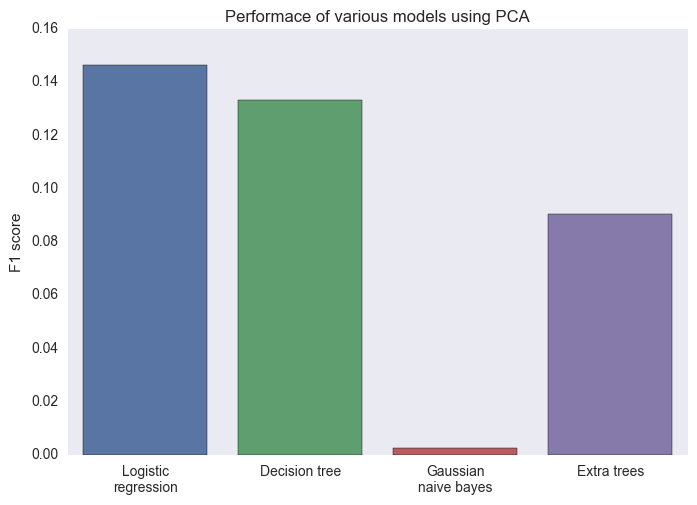

In [36]:
sb.barplot(labels_pca, scores_pca)
plt.title('Performace of various models using PCA')
plt.ylabel('F1 score')